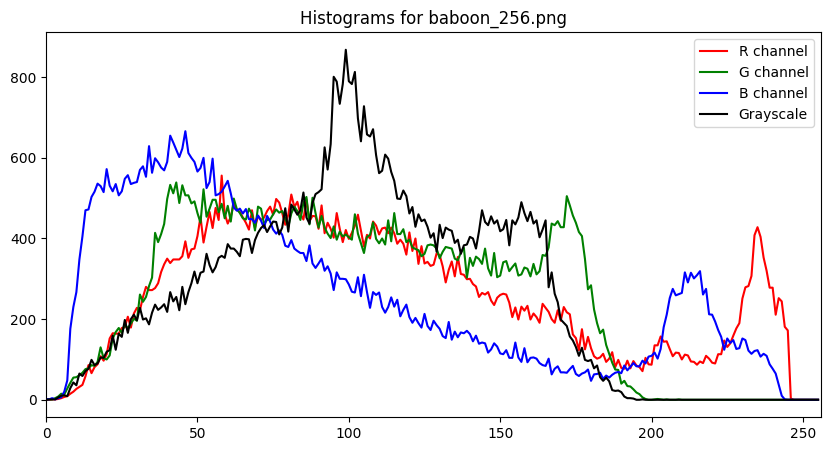

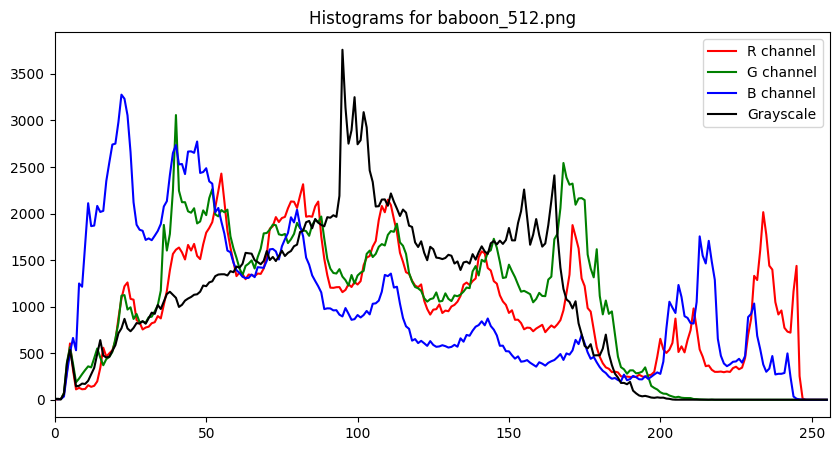

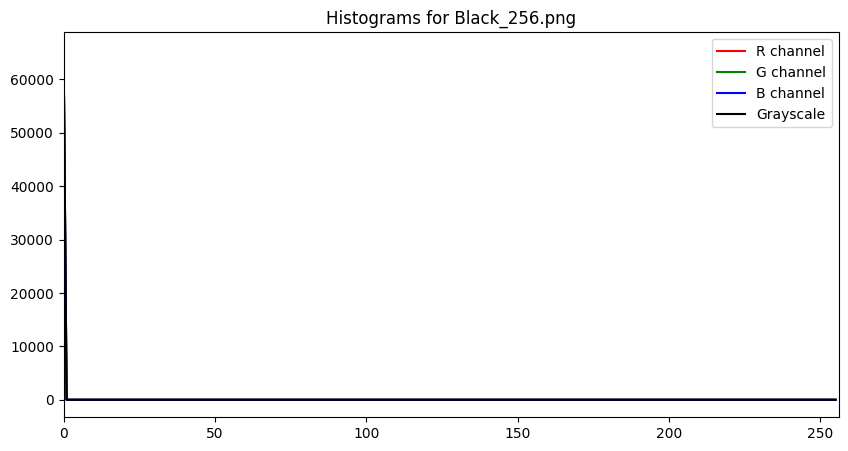

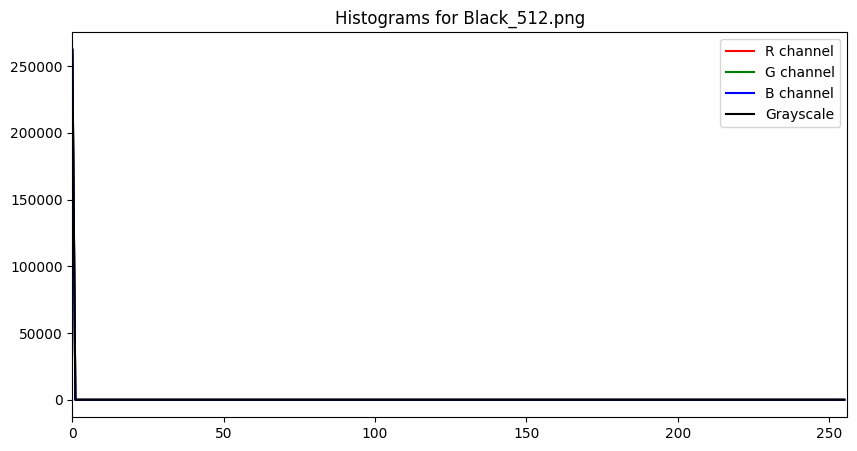

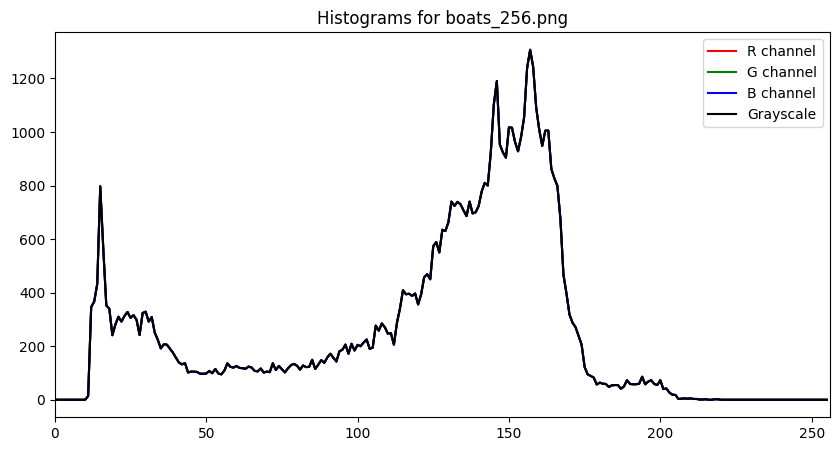

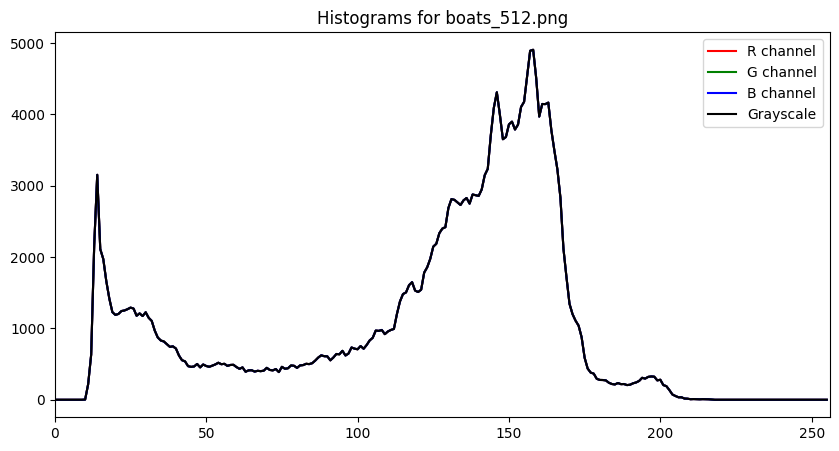

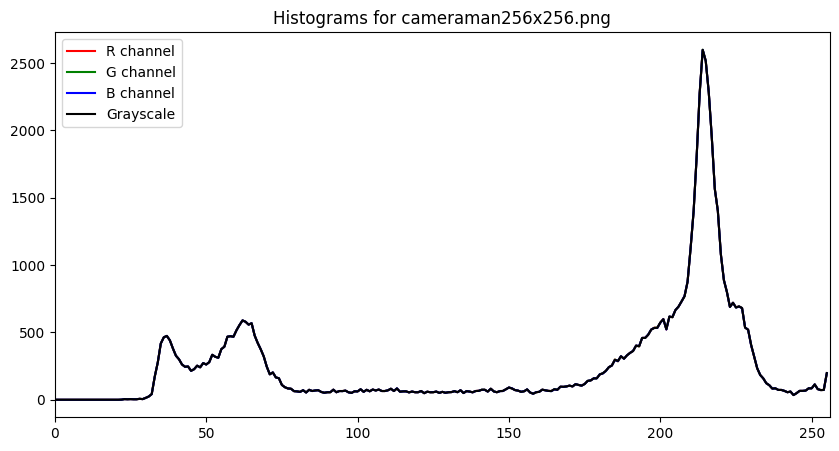

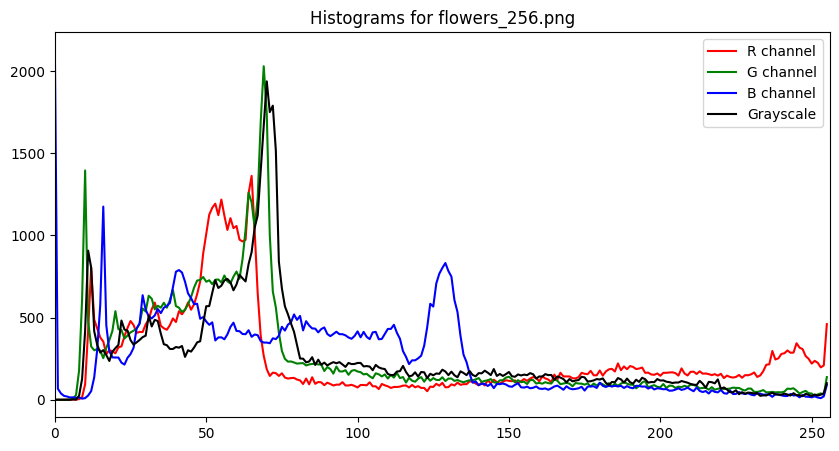

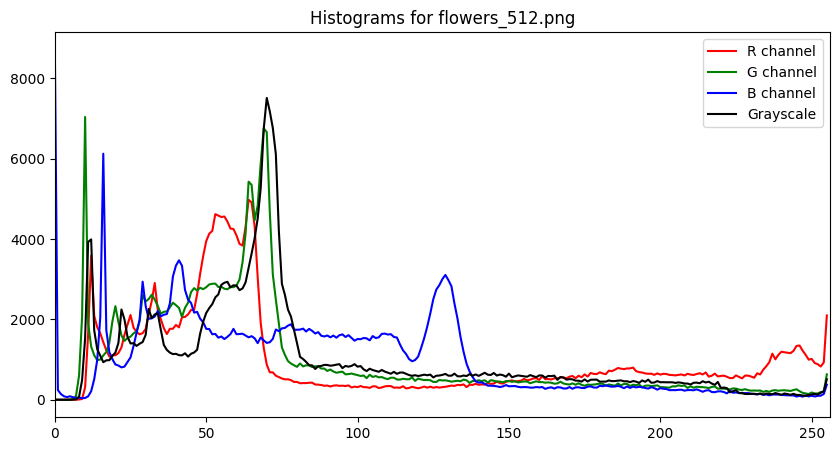

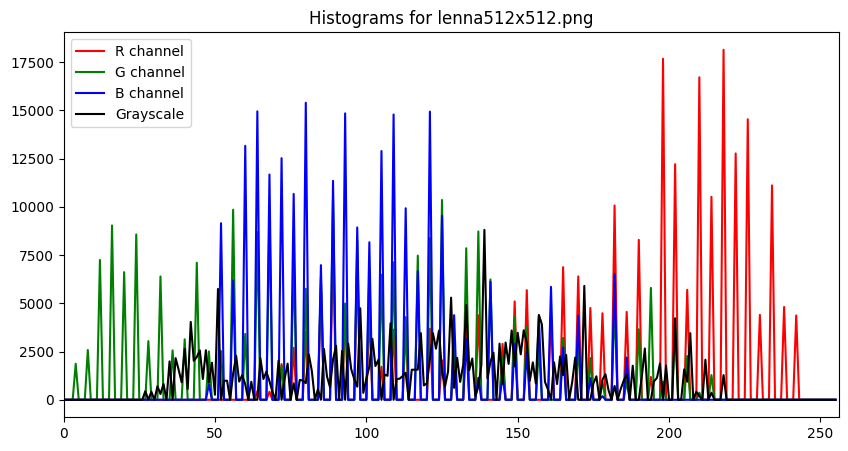

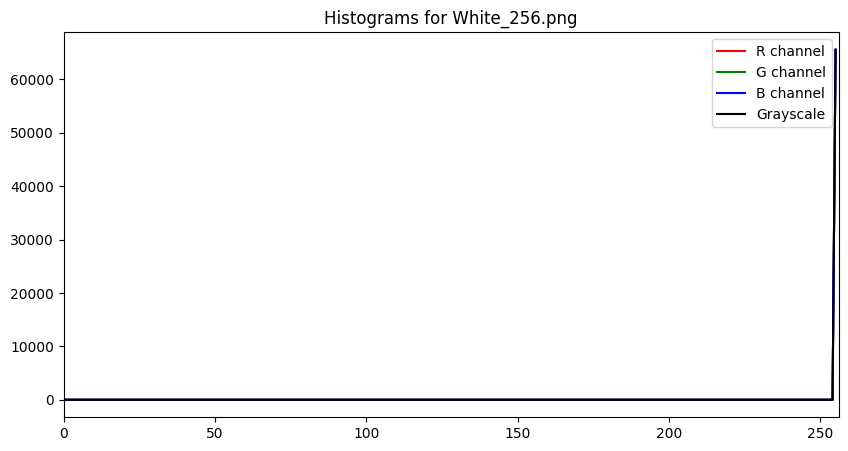

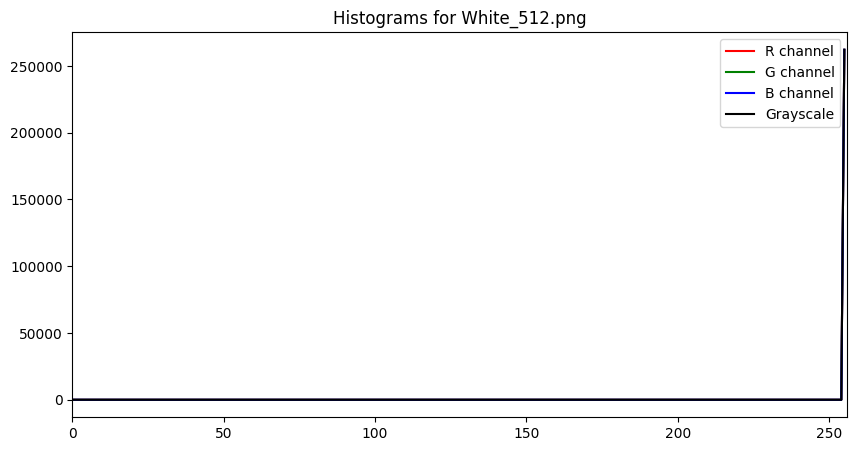

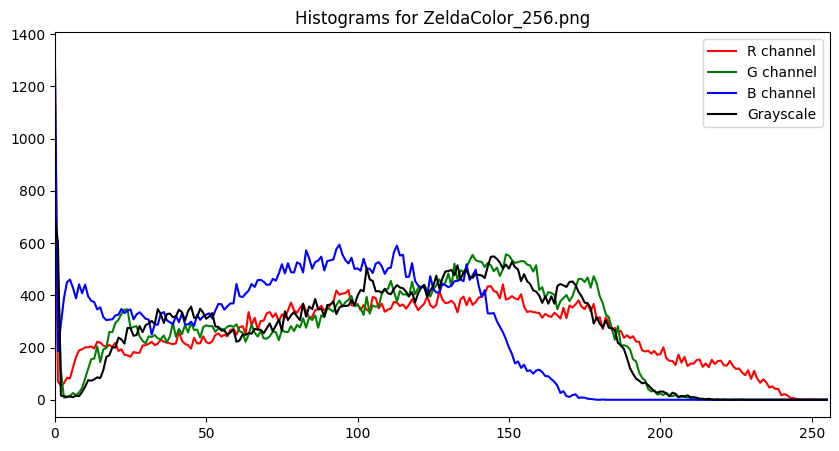

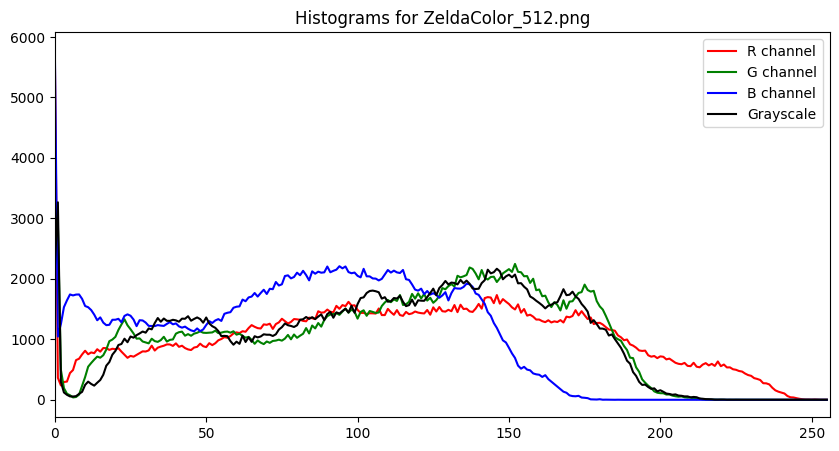

In [6]:
import os
from glob import glob
import cv2
import matplotlib.pyplot as plt

def plot_combined_histograms(image_rgb, image_gray, title="Combined Histograms"):
    # Combined RGB Histogram
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    colors = ('r', 'g', 'b')
    for i, color in enumerate(colors):
        hist = cv2.calcHist([image_rgb], [i], None, [256], [0, 256])
        ax.plot(hist, color=color, label=f'{color.upper()} channel')
    
    # Grayscale Histogram
    hist_gray = cv2.calcHist([image_gray], [0], None, [256], [0, 256])
    ax.plot(hist_gray, color='k', label='Grayscale')
    
    ax.set_xlim([0, 256])
    ax.set_title(title)
    ax.legend()
    
    plt.show()

def process_folder(folder_path):
    image_files = glob(os.path.join(folder_path, '*.png'))  # Adjust the file extension if needed
    for image_file in image_files:
        image = cv2.imread(image_file)
        if image is not None:
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            title = f"Histograms for {os.path.basename(image_file)}"
            plot_combined_histograms(image_rgb, image_gray, title)

# Define the folder path
folder_path = 'plain_images'  # Update this to the actual folder path containing your images

# Process the images in the folder
process_folder(folder_path)


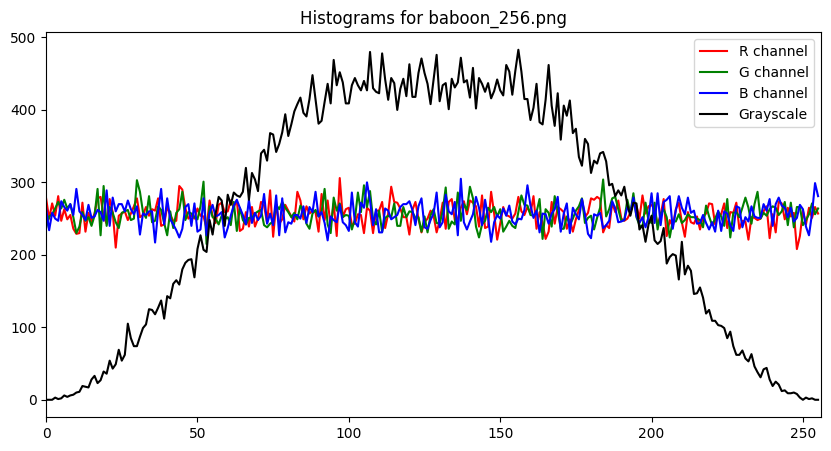

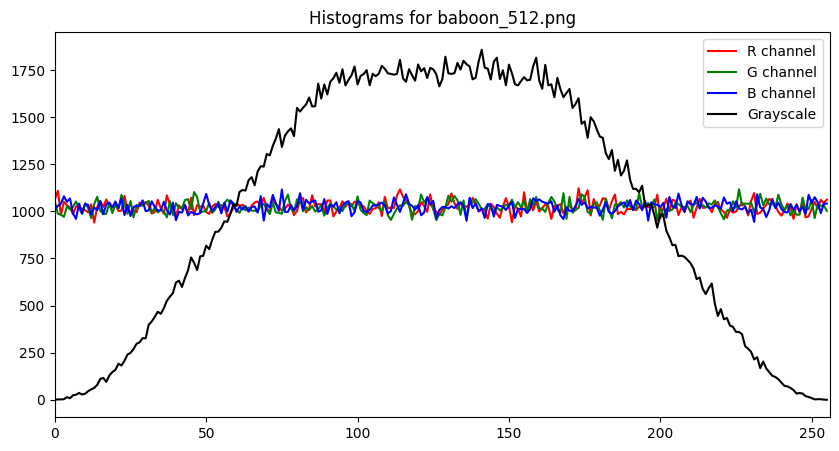

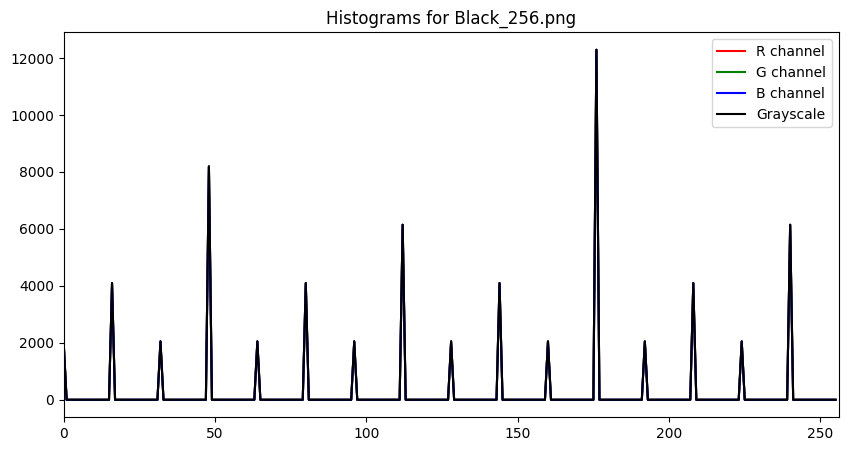

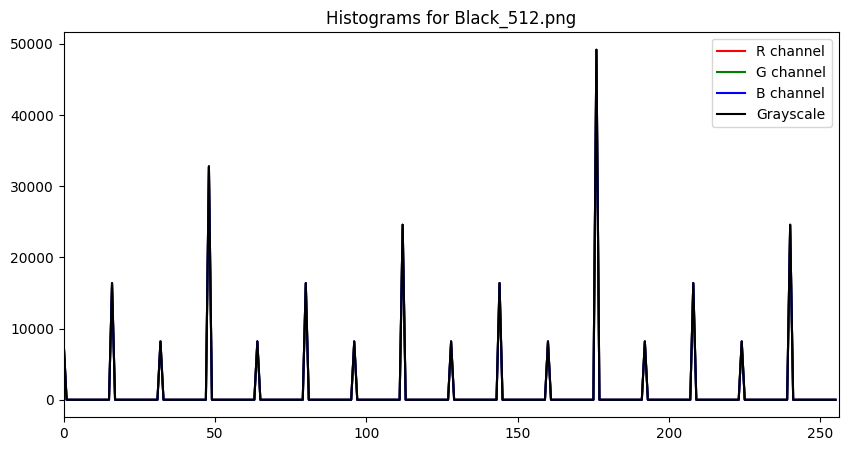

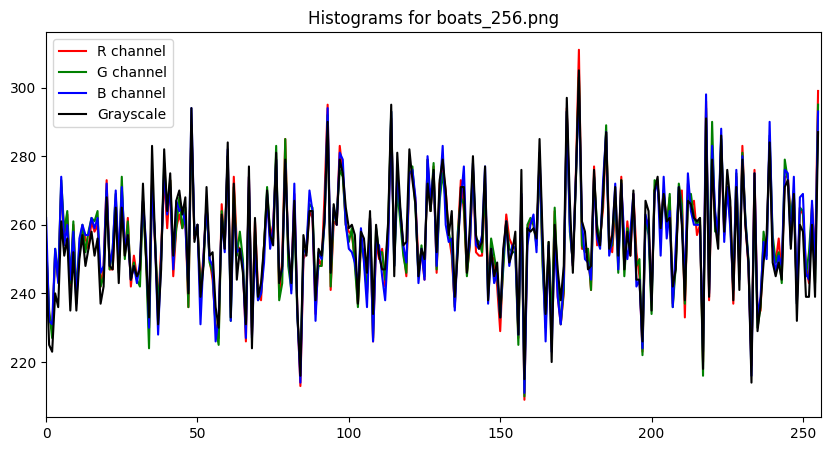

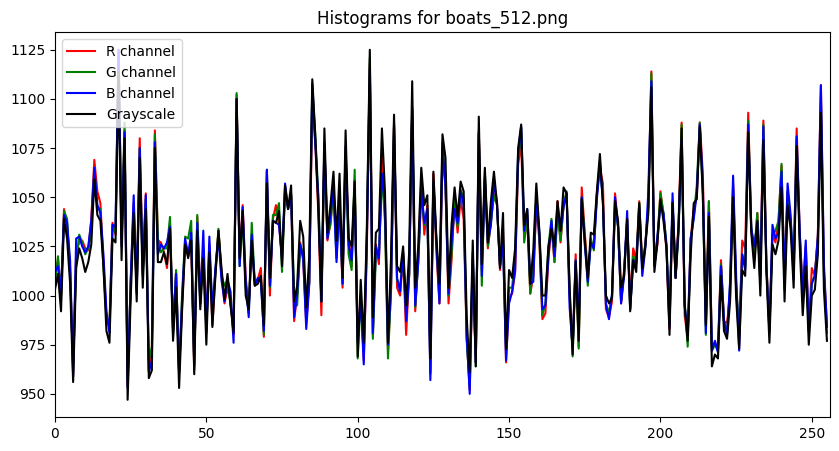

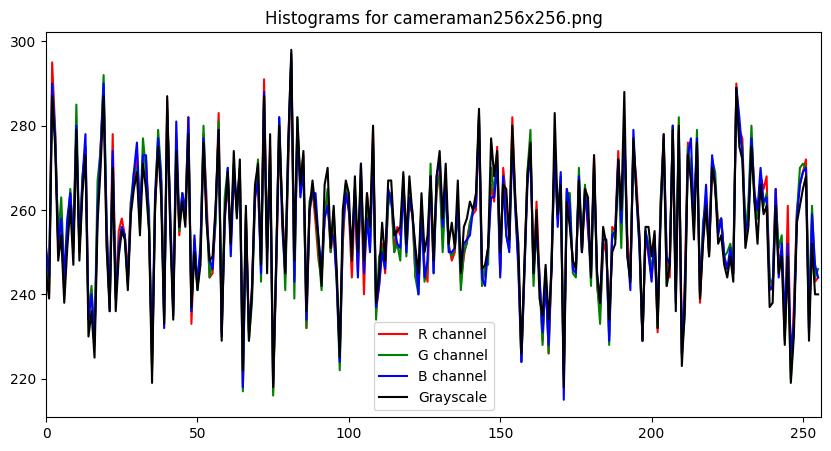

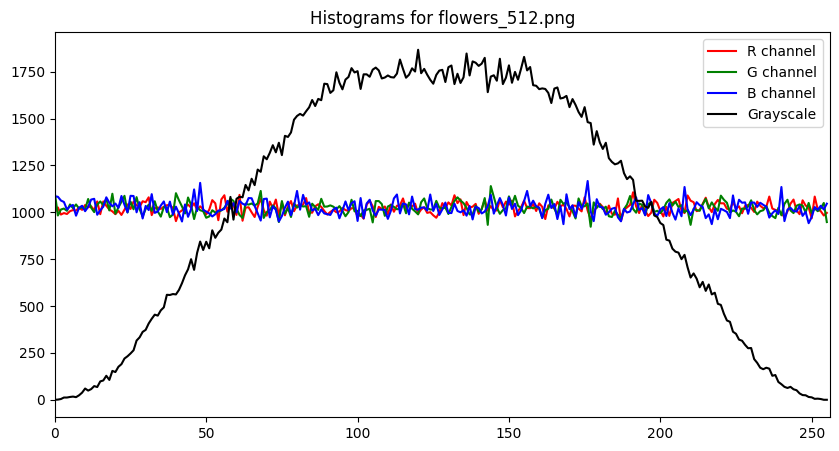

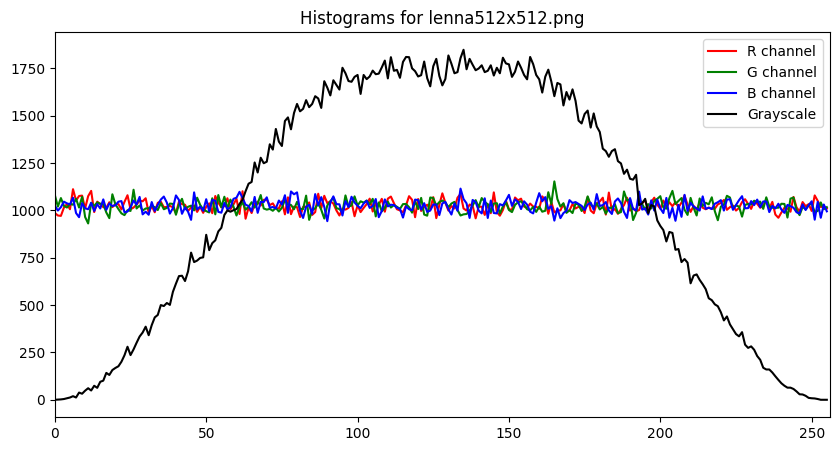

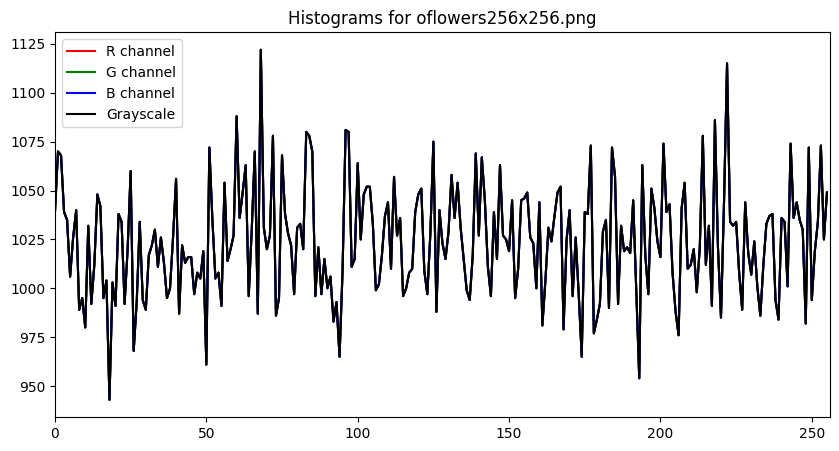

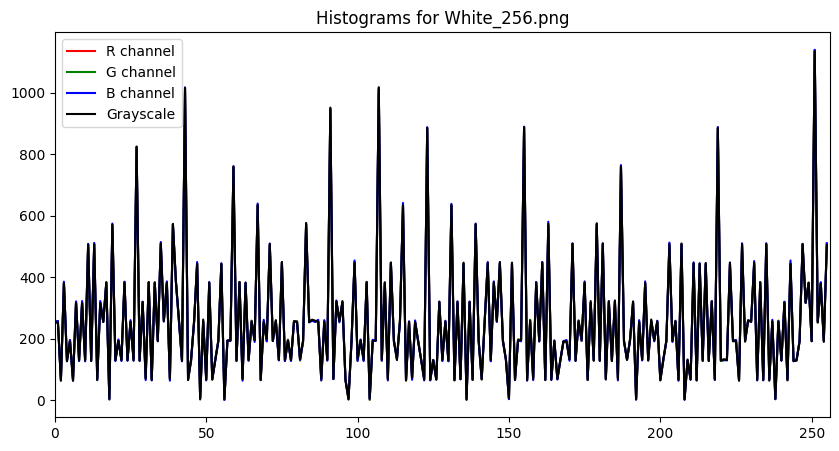

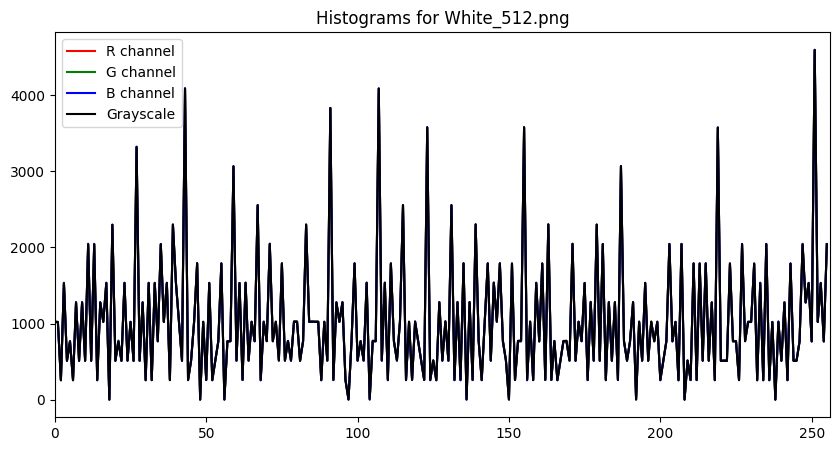

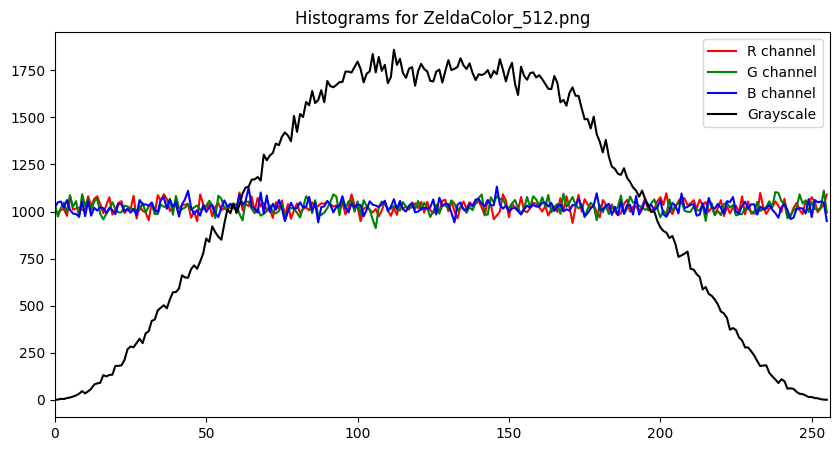

In [7]:
import os
from glob import glob
import cv2
import matplotlib.pyplot as plt

def plot_combined_histograms(image_rgb, image_gray, title="Combined Histograms"):
    # Combined RGB Histogram
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    colors = ('r', 'g', 'b')
    for i, color in enumerate(colors):
        hist = cv2.calcHist([image_rgb], [i], None, [256], [0, 256])
        ax.plot(hist, color=color, label=f'{color.upper()} channel')
    
    # Grayscale Histogram
    hist_gray = cv2.calcHist([image_gray], [0], None, [256], [0, 256])
    ax.plot(hist_gray, color='k', label='Grayscale')
    
    ax.set_xlim([0, 256])
    ax.set_title(title)
    ax.legend()
    
    plt.show()

def process_folder(folder_path):
    image_files = glob(os.path.join(folder_path, '*.png'))  # Adjust the file extension if needed
    for image_file in image_files:
        image = cv2.imread(image_file)
        if image is not None:
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            title = f"Histograms for {os.path.basename(image_file)}"
            plot_combined_histograms(image_rgb, image_gray, title)

# Define the folder path
folder_path = 'HAD_VAD'  # Update this to the actual folder path containing your images

# Process the images in the folder
process_folder(folder_path)


In [9]:
import cv2
import numpy as np
import os
from glob import glob
import pandas as pd
import scipy.stats as stats

def chi_square_test(image):
    # Calculate the histogram for each channel
    hist_r = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([image], [1], None, [256], [0, 256])
    hist_b = cv2.calcHist([image], [2], None, [256], [0, 256])
    
    # Concatenate histograms
    hist = np.concatenate((hist_r, hist_g, hist_b))
    
    # Number of bins
    Nc = 256
    
    # Total number of pixels
    N = image.shape[0] * image.shape[1] * 3
    
    # Expected frequency for a uniform distribution
    Ei = N / Nc
    
    # Calculate the chi-square statistic
    chi_square_stat = np.sum(((hist - Ei) ** 2) / Ei)
    
    return chi_square_stat

def process_folder_for_chi_square(folder_path):
    image_files = glob(os.path.join(folder_path, '*.png'))  # Adjust the file extension if needed
    results = []
    for image_file in image_files:
        image = cv2.imread(image_file)
        if image is not None:
            chi_square_stat = chi_square_test(image)
            results.append({
                'Image': os.path.basename(image_file),
                'Size': f"{image.shape[0]} x {image.shape[1]} x {image.shape[2]}",
                'Chi-Square Test': chi_square_stat
            })
    return results

# Define the folder path
folder_path = 'HAD_VAD'  # Update this to the actual folder path containing your images

# Process the images in the folder
chi_square_results = process_folder_for_chi_square(folder_path)

# Convert results to DataFrame and save to CSV
df_results = pd.DataFrame(chi_square_results)
df_results.to_csv('HAD_VAD/chi_square_test_results.csv', index=False)
